## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.3):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units,
                                   activation='relu',
                                   name='hidden_layer'+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(input=[input_layer], output=[out])
            
    return model

In [10]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.2, 0.3, 0.4]

In [18]:
results = {}

for i, exp in enumerate(Dropout_EXP):
    keras.backend.clear_session()
    print("Experiment with Dropout = %.6f" % (exp))
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=exp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = f"model-dropout{str(exp)}"
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128) 

/Users/YuwenChiu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 229s 5ms/step - loss: 2.0416 - acc: 0.2477 - val_loss: 1.8138 - val_acc: 0.3485
Epoch 2/50
50000/50000 [==============================] - 226s 5ms/step - loss: 1.8388 - acc: 0.3356 - val_loss: 1.7270 - val_acc: 0.3832
Epoch 3/50
50000/50000 [==============================] - 228s 5ms/step - loss: 1.7787 - acc: 0.3616 - val_loss: 1.6627 - val_acc: 0.4127
Epoch 4/50
50000/50000 [==============================] - 231s 5ms/step - loss: 1.7393 - acc: 0.3750 - val_loss: 1.6485 - val_acc: 0.4157
Epoch 5/50
50000/50000 [==============================] - 253s 5ms/step - loss: 1.7024 - acc: 0.3899 - val_loss: 1.5948 - val_acc: 0.4273
Epoch 6/50
50000/50000 [==============================] - 236s 5ms/step - loss: 1.6858 - acc: 0.3946 - val_loss: 1.5960 - val_acc: 0.4393
Epoch 7/50
50000/50000 [==============================] - 230s 5ms/step - loss: 1.6569 - acc: 0.4049 - val_loss: 1.5744 - 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 229s 5ms/step - loss: 2.0869 - acc: 0.2259 - val_loss: 1.8754 - val_acc: 0.3236
Epoch 2/50
50000/50000 [==============================] - 1711s 34ms/step - loss: 1.9155 - acc: 0.3003 - val_loss: 1.7809 - val_acc: 0.3639
Epoch 3/50
50000/50000 [==============================] - 248s 5ms/step - loss: 1.8653 - acc: 0.3221 - val_loss: 1.7510 - val_acc: 0.3799
Epoch 4/50
50000/50000 [==============================] - 238s 5ms/step - loss: 1.8266 - acc: 0.3383 - val_loss: 1.7474 - val_acc: 0.3698
Epoch 5/50
50000/50000 [==============================] - 229s 5ms/step - loss: 1.8084 - acc: 0.3432 - val_loss: 1.7236 - val_acc: 0.3913
Epoch 6/50
50000/50000 [==============================] - 233s 5ms/step - loss: 1.7864 - acc: 0.3543 - val_loss: 1.6861 - val_acc: 0.4158
Epoch 7/50
50000/50000 [==============================] - 246s 5ms/step - loss: 1.7738 - acc: 0.3595 - val_loss: 1.6815 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 244s 5ms/step - loss: 2.1450 - acc: 0.1885 - val_loss: 1.9238 - val_acc: 0.3046
Epoch 2/50
50000/50000 [==============================] - 243s 5ms/step - loss: 2.0023 - acc: 0.2470 - val_loss: 1.8982 - val_acc: 0.3150
Epoch 3/50
50000/50000 [==============================] - 244s 5ms/step - loss: 1.9641 - acc: 0.2653 - val_loss: 1.9029 - val_acc: 0.3305
Epoch 4/50
50000/50000 [==============================] - 242s 5ms/step - loss: 1.9432 - acc: 0.2736 - val_loss: 1.8983 - val_acc: 0.3281
Epoch 5/50
50000/50000 [==============================] - 247s 5ms/step - loss: 1.9060 - acc: 0.2901 - val_loss: 1.8305 - val_acc: 0.3578
Epoch 6/50
50000/50000 [==============================] - 246s 5ms/step - loss: 1.8959 - acc: 0.2972 - val_loss: 1.8383 - val_acc: 0.3491
Epoch 7/50
50000/50000 [==============================] - 246s 5ms/step - loss: 1.8871 - acc: 0.3006 - val_loss: 1.8620 - 

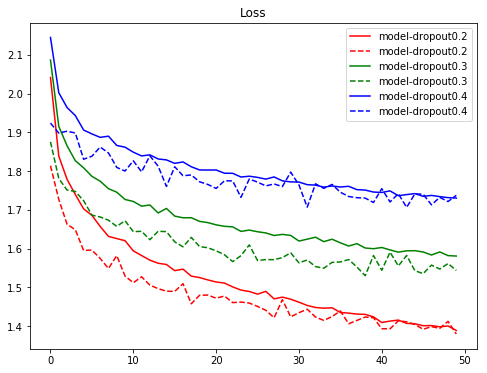

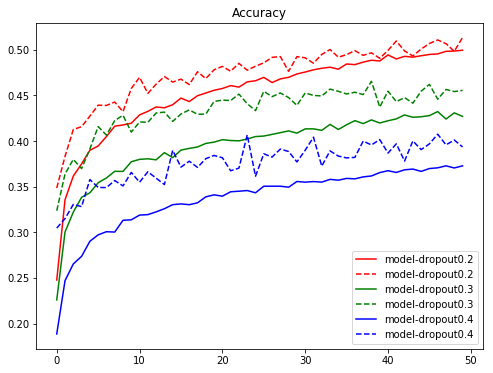

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()